Epoch 1/10
467/467 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5378 - loss: 5.1412
Epoch 2/10
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5575 - loss: 1.0084
Epoch 3/10
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5626 - loss: 0.8744
Epoch 4/10
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5715 - loss: 0.8449
Epoch 5/10
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5824 - loss: 0.7529
Epoch 6/10
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5687 - loss: 0.8193
Epoch 7/10
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5830 - loss: 0.7284
Epoch 8/10
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5953 - loss: 0.7093
Epoch 9/10
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5823 - loss: 0.7101
Epoch 10/10
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5881 - loss: 0.6914



✅ Test Accuracy: 60.99%
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


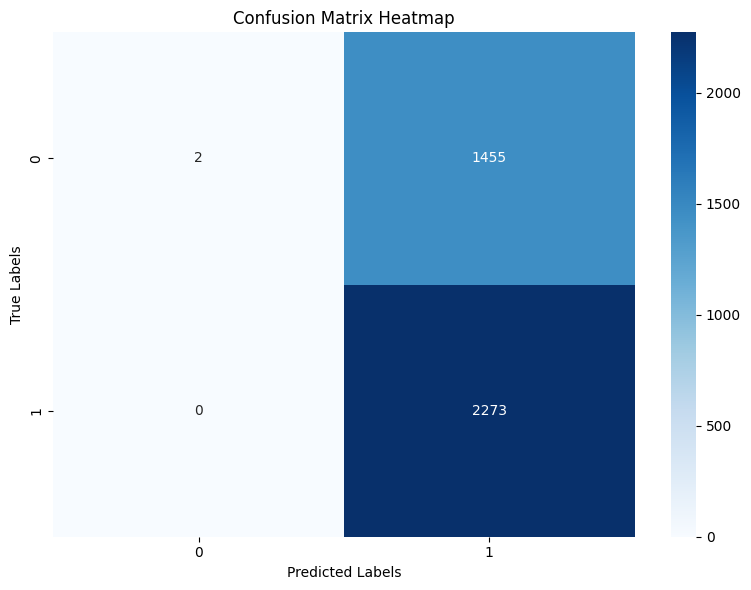

In [4]:
import pandas as pd
import numpy as np
import os
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import model_from_json

# File path setup
base_path = r"C:\Users\sagni\Downloads\Email Phising Detector"
csv_file = os.path.join(base_path, "Phishing_Email.csv")

# Load dataset
df = pd.read_csv(csv_file)

# Separate features and label (assuming label is the last column)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Handle non-numeric columns in features
X = pd.get_dummies(X)

# Ensure all data is float32
X = X.astype('float32')

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Save label encoder
with open(os.path.join(base_path, "label_encoder.pkl"), 'wb') as f:
    pickle.dump(label_encoder, f)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Build model with Input layer
model = Sequential()
model.add(Input(shape=(X.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {accuracy * 100:.2f}%")

# Save model (.h5)
model.save(os.path.join(base_path, "email_model.h5"))

# Save architecture in JSON
with open(os.path.join(base_path, "email_model.json"), "w") as json_file:
    json_file.write(model.to_json())

# Predict on test data
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix heatmap
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.tight_layout()
plt.savefig(os.path.join(base_path, "confusion_matrix_heatmap.png"))
plt.show()
